# Task 0: Choosing you project topic

We select the problem type 1: Focusing on Data Modelling and the dataset we choose is Online Shoppers Purchasing Intention Dataset Data Set.

# Task 1: Retrieving and Preparing the Data

<h4><b>Import library</b></h4>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, chi2, SelectKBest
set_config(display='diagram')

<h4><b>Load data</b></h4>

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv', sep=',')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<h4><b>Data description</b></h4>

<p>The dataset consists of 10 numerical and 8 categorical attributes.</p>
<p>The 'Revenue' attribute can be used as the class label.</p>
<p>We refer to split the data set into train set and test set with ratio 70%-30%. Test set will be kept to calculate the accuracy of the model</p>

In [4]:
df, test_df = train_test_split(data, test_size=0.3, random_state=0)
train_df, val_df = train_test_split(df, test_size=0.75, random_state=0)

### a) Check data types

In [5]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The data types are the same as description of the dataset

### b) Deal with missing values
We check the data type of each column and whether the column has missing value

In [6]:
train_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<p>Well, there is no missing values to process</p>
<p>Next, We will select the numeric columns and category columns to handle specific types easily</p>

In [7]:
cate_cols = train_df.columns[-8:]
nume_cols = train_df.columns.drop(cate_cols)

### c) Identify outliers
In this step, we will deal with outliers on numerical columns


In [8]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,2.307835,78.836597,0.490960,33.608935,31.952712,1211.965153,0.022796,0.043019,5.514256,0.063051,2.108020,2.379230,3.181734,4.057024
std,3.345143,165.281312,1.305596,136.743142,46.484079,2045.336501,0.048836,0.048826,17.969545,0.198025,0.910624,1.760443,2.466920,3.980588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.500000,0.000000,0.013618,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,600.750000,0.002985,0.026316,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,95.170000,0.000000,0.000000,37.000000,1436.500000,0.018182,0.048235,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
max,24.000000,2629.253968,24.000000,2050.433333,705.000000,43171.233380,0.200000,0.200000,261.491286,1.000000,8.000000,13.000000,9.000000,20.000000


* Interquartile Range Method

In [9]:
Q1 = train_df[nume_cols].quantile(0.25)
Q3 = train_df[nume_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_iqr_df = train_df[~((train_df[nume_cols] < (Q1 - 1.5 * IQR)) | (train_df[nume_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_iqr_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 56.1%


This method made us surprised that the outliers claim too high percentage so we need to visualize them

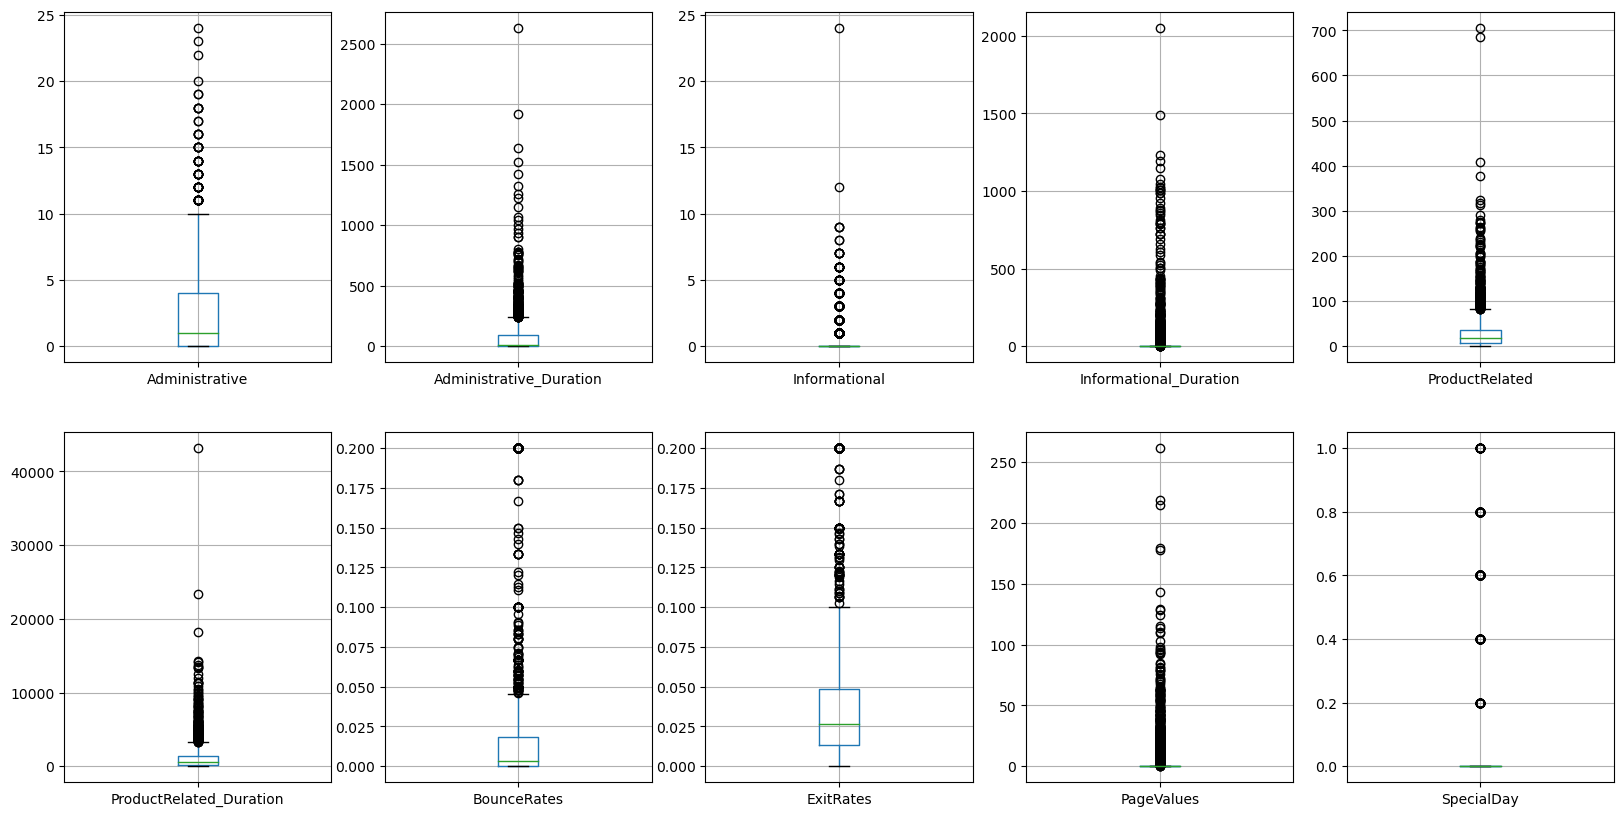

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for index in range(len(nume_cols)):
    row, col = index // 5, index % 5
    train_df.boxplot(nume_cols[index], ax = axes[row, col], fontsize=10) 
plt.show()

Look at the graph, we can see that each numerical column contains too many outliers that we can not remove them because it can affect the result

* Standard deviation method

In [11]:
data_mean, data_std = np.mean(train_df[nume_cols]), np.std(train_df[nume_cols])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outlier_std_df = train_df[~((train_df[nume_cols] < lower) | (train_df[nume_cols] > upper)).any(axis=1)]
print(f'Percentage of outliers: {round((1-outlier_std_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 18.45%


The percentage of outliers is so high that we wonder whether the values are outliers. We intend to use another method so as to handle.

* Automatic Outlier Detection

In [12]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train_df[nume_cols])
mask = yhat != -1
outlier_aod_df = train_df.iloc[mask]
print(f'Percentage of outliers: {round((1-outlier_aod_df.shape[0]/train_df.shape[0])*100, 2)}%')

Percentage of outliers: 12.93%


<b>We can see that there are too many outliers existed in the dataset. We wonder whether they have their own meaning so we decide to ignore them.</b>

### d) Check duplicates

In [13]:
duplicates = train_df.shape[0] - train_df.drop_duplicates().shape[0]
print(f'There are {duplicates} duplicate(s) in the train set and it claims {round(duplicates*100/train_df.shape[0],2)}%')

There are 5 duplicate(s) in the train set and it claims 0.23%


The dataset contains some duplicates so we decide to remove them

In [14]:
train_df.drop_duplicates(inplace=True)

### e) Check category columns

In [15]:
for col in cate_cols:
    print(f'{col}: {train_df[col].unique()}')

Month: ['Nov' 'May' 'Oct' 'Sep' 'Dec' 'Mar' 'Aug' 'June' 'Feb' 'Jul']
OperatingSystems: [2 1 3 8 4 7 6 5]
Browser: [ 2  1  4  7 10  6 13  5  8 12  3 11]
Region: [1 9 7 3 2 8 4 5 6]
TrafficType: [13  2  6  3  1  4 20 11  8  9  5  7 18 10 15 14 16 19]
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: [False  True]
Revenue: [False  True]


After checking by hand, we see that the data is quite correct so we do not need to repair.
In order to handle conveniently, we will encode which columns are not number to number later 

# Task 2: Feature Engineering

To find the correlation of each features, we should encode the object values to number in order to handle

In [16]:
encode_df = train_df.copy()
LE = LabelEncoder()
obj_cols = train_df.select_dtypes(['bool', 'object'])
for col in obj_cols:
    encode_df[col] = LE.fit_transform(encode_df[col])
encode_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11154,0,0.000000,0,0.000000,2,0.000000,0.100000,0.150000,0.000000,0.0,7,2,2,1,13,2,0,0
3444,0,0.000000,0,0.000000,6,916.250000,0.000000,0.006667,0.000000,0.0,6,2,2,9,2,2,0,0
3453,4,32.100000,1,75.000000,88,3827.753571,0.000000,0.007270,0.255191,0.0,6,2,2,7,6,2,0,0
7981,2,17.133333,0,0.000000,20,1078.200000,0.020000,0.051167,0.000000,0.0,8,1,1,1,3,2,0,0
11890,6,161.833333,5,858.570833,84,2701.337954,0.010771,0.016382,7.477388,0.0,7,1,2,1,1,2,0,1


After encoding, we use selectKBest method to find the correlation between each features and revenue column. This method selects f_classif function to calculate the score

In [17]:
best_features = SelectKBest(score_func=chi2, k=7)
X = encode_df.drop(['Revenue'], axis=1)
y = encode_df['Revenue']
fit = best_features.fit(X, y)
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)
featureScores = pd.concat([columns_df, scores_df],axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10, 'Score'))

                    Feature          Score
5   ProductRelated_Duration  161719.697731
8                PageValues   29368.384595
3    Informational_Duration    7495.931952
1   Administrative_Duration    3078.288069
4            ProductRelated    3016.365711
0            Administrative     136.756842
2             Informational      46.399290
9                SpecialDay       9.781710
15              VisitorType       6.911266
10                    Month       6.584860


<p>We select top 7 columns that most correlative with Revenue column.</p>

# Data Modelling

### Setup

<p>In order to handle easier and cleaner, we prefer to create a pipeline for each model</p>
<p>Firstly, we create the Encode class to switch the object and bool value to numerical value</p>

In [55]:
class Encode():
    def __init__(self, method=LabelEncoder()):
        self.method = method
    def fit(self, X, y=None):
        self.columns = X.select_dtypes(['bool', 'object']).columns.values
        return self
    def transform(self, X, y=None):
        for col in self.columns:
            X[col] = self.method.fit_transform(X[col])
        return X

In [69]:
cate_cols = cate_cols[:-1]
X = train_df.drop(['Revenue'], axis=1)
y = train_df['Revenue']
val_X = val_df.drop(['Revenue'], axis=1)

nume_trans = SimpleImputer()
cate_trans = SimpleImputer(strategy='most_frequent')
cols_trans = make_column_transformer(
    (nume_trans, nume_cols),
    (cate_trans, cate_cols)
)
preprocess_pipeline = Pipeline([
    ('encode', Encode()),
    ('col_reducer', ColReducer(columns_list=cate_cols)),
    ('select_features', SelectFeature(score_func=chi2, k=7)),
    ('scaler', StandardScaler())
])
preprocess_pipeline.fit_transform(X, y)
preprocess_pipeline.transform(val_X)

array([[-0.56801239, -0.30732793, -0.2461412 , ..., -0.60263772,
        -0.39242111, -0.37662851],
       [-0.23871416, -0.30732793, -0.2461412 , ...,  0.12849357,
        -0.69124993, -0.37662851],
       [-0.46514887, -0.30732793, -0.2461412 , ..., -0.25857594,
         0.20523652, -0.37662851],
       ...,
       [-0.41041864,  0.62268586, -0.2461412 , ..., -0.40910297,
        -0.69124993, -0.37662851],
       [ 0.45882385, -0.08621957, -0.1365406 , ...,  0.55857079,
         0.80289416,  0.38872045],
       [-0.10316782, -0.30732793, -0.2461412 , ..., -0.23707208,
        -0.39242111, -0.37662851]])

<p>Some category columns have too many categories that will affect the model. So, we choose which columns that have more than 5 categories to reduce and replace which value is less than 1% of the most frequent value</p>

In [62]:
class ColReducer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_list=[], num_top_values_list=[], percentage=1, categories=5, default=-1):
        self.num_top_values_list = num_top_values_list
        self.columns_list = columns_list
        self.percentage = percentage
        self.categories = categories
        self.default = default

    def getLogicNumberTopValue(self, X_df, column):
        counts = X_df[column].value_counts()
        return sum([1 for value in list(counts.values) if value>(self.percentage*max(list(counts.values))/100)])

    def reprocessing_data(self, X_df):
        self.columns_list = [column for column in self.columns_list if len(X_df[column].value_counts())>=self.categories]
        if len(self.num_top_values_list)==0:
            self.num_top_values_list = [self.getLogicNumberTopValue(X_df, column) for column in self.columns_list]

    def fit(self, X_df, y=None):
        self.reprocessing_data(X_df)
        self.top_values_list = []
        for column, num_top_values in zip(self.columns_list, self.num_top_values_list):
            counts_ = X_df[column].value_counts()
            ids = list(counts_.index)
            self.top_values_list.append(ids[:max(1, min(num_top_values, len(ids)))])
        return self
    
    def transform(self, X_df, y=None):
        df = X_df.copy()
        for top_value, column in zip(self.top_values_list, self.columns_list):
            df.loc[~df[column].isin(top_value), column] = self.default
        return df

In [27]:
col_reducer = ColReducer(columns_list=cate_cols)
col_reducer.fit(train_df)
new_train_X_df = col_reducer.transform(train_df)
new_train_X_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11154,0,0.000000,0,0.000000,2,0.000000,0.100000,0.150000,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
3444,0,0.000000,0,0.000000,6,916.250000,0.000000,0.006667,0.000000,0.0,May,2,2,9,2,Returning_Visitor,False,False
3453,4,32.100000,1,75.000000,88,3827.753571,0.000000,0.007270,0.255191,0.0,May,2,2,7,6,Returning_Visitor,False,False
7981,2,17.133333,0,0.000000,20,1078.200000,0.020000,0.051167,0.000000,0.0,Oct,1,1,1,3,Returning_Visitor,False,False
11890,6,161.833333,5,858.570833,84,2701.337954,0.010771,0.016382,7.477388,0.0,Nov,1,2,1,1,Returning_Visitor,False,True


We create the SelectFeature class to choose the selected columns above

In [29]:
class SelectFeature():
    def __init__(self, score_func=chi2, k=7):
        self.score_func = score_func
        self.k = k
    def fit(self, X, y):
        best_features = SelectKBest(score_func=self.score_func, k=self.k)
        fit = best_features.fit(X, y)
        scores_df = pd.DataFrame(fit.scores_)
        columns_df = pd.DataFrame(X.columns)
        feature_scores_df = pd.concat([columns_df, scores_df], axis=1)
        feature_scores_df.columns = ['Feature', 'Score']
        self.features = feature_scores_df.nlargest(self.k, 'Score')['Feature'].values
        return self
    def transform(self, X, y=None):
        return X[self.features]

<p>Next, we use OneHotEncoder to encode the categorical columns</p>
<p>Note: OneHotEncoder require scikit-learn 1.2 to use function get_feature_names_out()</p>

In [30]:
# class OneHotEncoding:
#     def __init__(self, columns, handle_unknown_type='ignore', isSparse=False):
#         self.model = OneHotEncoder(handle_unknown=handle_unknown_type, sparse=isSparse)
#         self.columns = columns
        
#     def fit_transform(self, df, visualize=False):
#         for col in self.columns:
#             self.matrix = self.model.fit_transform(df[[col]])  # get a matrix of new features and values
#             names = self.model.get_feature_names_out()  # get names for these features
#             df_oh = pd.DataFrame(data=self.matrix, columns=names, index=df.index)
#             if visualize: display(df_oh.plot.hist())
#             df = pd.concat([df, df_oh], axis=1)
#             df.drop(col, axis=1, inplace=True)
#         return df

#     def retransform_with_values(self, columns, values):
#         dic = {}
#         for col, value in zip(columns, values):
#             split_col = col.rsplit('_')
#             if split_col[0] not in dic:
#                 dic[split_col[0]] = (value, 1)
#             else:
#                 dic[split_col[0]] = (dic[split_col[0]][0]+value, dic[split_col[0]][1]+1)
#         key = list(dic.keys())
#         return key, [dic[k][0]/dic[k][1] for k in key]


In [31]:
# cate_df = df.drop([nume_cols, 'Revenue'], axis=1)
# onehotencoder = OneHotEncoding(cate_df.select_dtypes("object").columns, handle_unknown_type='ignore', isSparse=False)
# cate_ohc_df = onehotencoder.fit_transform(cate_df)
# cate_ohc_df

Next, we will create the preprocess_pipeline to transform the validation set [2]

In [37]:
cate_cols = cate_cols[:-1]
X = train_df.drop(['Revenue'], axis=1)
y = train_df['Revenue']


nume_trans = SimpleImputer()
cate_trans = SimpleImputer(strategy='most_frequent')
cols_trans = make_column_transformer(
    (nume_trans, nume_cols),
    (cate_trans, cate_cols)
)
preprocess_pipeline = Pipeline([
    ('fill_missing', cols_trans),
    ('encode', Encode()),
    ('col_reducer', ColReducer(columns_list=cate_cols)),
    ('select_features', SelectFeature(score_func=chi2, k=7))
])
preprocess_pipeline.fit_transform(X, y)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

### Classification

In [ ]:
train_accs = []
val_accs = []
alphas = [0,0.01,0.1, 1, 10, 100]
k_s = [3, 5, 7, 9, 15, 17]
best_val_acc = 0
best_alpha = None
best_k = None

full_pipeline = make_pipeline(
    preprocess_pipeline,
    SelectKBest(chi2),
    MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=0, learning_rate_init=0.05, max_iter=100)
)
full_pipeline

In [ ]:
# full_pipeline.set_params(selectkbest__k=15)
# full_pipeline.fit(train_X_df, train_y_sr)
# train_score, val_score = full_pipeline.score(train_X_df, train_y_sr)*100, full_pipeline.score(val_X_df, val_y_sr)*100
for alpha in alphas:
    for k in k_s:
        full_pipeline.set_params(selectkbest__k=k, mlpclassifier__alpha=alpha)
        full_pipeline.fit(train_X_df, train_y_sr)
        train_score, val_score = full_pipeline.score(train_X_df, train_y_sr)*100, full_pipeline.score(val_X_df, val_y_sr)*100
        train_accs.append(train_score)
        val_accs.append(val_score)
        if val_score>best_val_acc:
            best_val_acc, best_alpha, best_k = val_score, alpha, k

In [ ]:
# Visualizing the result
train_accs_df = pd.DataFrame(data=np.array(train_accs).reshape(len(alphas), -1),
                             index=alphas, columns=k_s)
val_accs_df = pd.DataFrame(
    data=np.array(val_accs).reshape(len(alphas), -1), 
    index=alphas, columns=k_s)
min_err = min(min(train_accs), min(val_accs))
max_err = max(max(train_accs), max(val_accs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('train accuracies'); plt.xlabel('value of k'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('validation accuracies'); plt.xlabel('value of k'); plt.ylabel('alpha');

# References

[1] https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ </p>
[2] https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression </p>